##### In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on       these statistics?

In [1]:
import pandas as pd
import numpy as np
import os


# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from env import host, user, password
from pydataset import data

In [2]:
import acquire
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import prepare
from scipy import stats

In [3]:
%run acquire
%run prepare

In [4]:


data('iris', show_doc=False)

df_iris = data('iris')

In [5]:
### Print first 3 rows

print(df_iris.head(3))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa


In [6]:
# print the number of rows and columns

print(df_iris.shape)

(150, 5)


In [7]:
# print the column names

print(df_iris.columns)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')


In [8]:
df_iris.columns.to_list()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [9]:
# print the data type of each column

print(df_iris.dtypes)

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object


In [10]:
# print the summary statistics for each of the numeric variables. 
# Would you recommend rescaling the data based on these statistics?

df_iris[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]].describe()




,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
stats = df_iris.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [12]:
stats['range'] = stats['max']-stats['min']


###### Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [13]:
df_excel = pd.read_excel('excel_exercises.xlsx', sheet_name='Table1_CustDetails')
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 661.0+ KB


In [14]:
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


In [15]:
# assign the first 100 rows to a new dataframe, df_excel_sample

df_excel_sample = df_excel.head(100)


In [16]:
# print the number of rows of your original dataframe

excel_index = df_excel.index

excel_rows = len(excel_index)

print(f'The number of rows in the excel data frame is {excel_rows}')

The number of rows in the excel data frame is 7049


In [17]:
df_excel.shape[0]

7049

In [18]:
df_excel.columns.values

array(['customer_id', 'gender', 'is_senior_citizen', 'partner',
       'dependents', 'phone_service', 'internet_service', 'contract_type',
       'payment_type', 'monthly_charges', 'total_charges', 'churn'],
      dtype=object)

In [19]:
# print the first 5 column names

print(df_excel[['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']].head())

  customer_id  gender  is_senior_citizen partner dependents
0  0002-ORFBO  Female                  0     Yes        Yes
1  0003-MKNFE    Male                  0      No         No
2  0004-TLHLJ    Male                  0      No         No
3  0011-IGKFF    Male                  1     Yes         No
4  0013-EXCHZ  Female                  1     Yes         No


In [20]:
# print the column names that have a data type of object

df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [21]:
excel_objects = df_excel.select_dtypes(include='object').columns.to_list()

print(excel_objects)

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']


In [22]:
print(df_excel[['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']].head())

  customer_id  gender partner dependents      payment_type churn
0  0002-ORFBO  Female     Yes        Yes      Mailed check    No
1  0003-MKNFE    Male      No         No      Mailed check    No
2  0004-TLHLJ    Male      No         No  Electronic check   Yes
3  0011-IGKFF    Male     Yes         No  Electronic check   Yes
4  0013-EXCHZ  Female     Yes         No      Mailed check   Yes


In [23]:
# compute the range for each of the numeric variables
df_excel.select_dtypes(include='float64').columns

(df_excel.select_dtypes(include='float64').max()) - (df_excel.select_dtypes(include='float64').min())

monthly_charges     100.5
total_charges      8666.0
dtype: float64

In [24]:
# compute the range for each of the numeric variables

excel_numeric_range = (df_excel[['monthly_charges', 'total_charges']].max()) - (df_excel[['monthly_charges', 'total_charges']].min())
excel_numeric_range

monthly_charges     100.5
total_charges      8666.0
dtype: float64

###### Read the data from this google sheet into a dataframe, df_google

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [25]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [26]:
# Use the replace method to modify our Google Sheet share url to be a csv export url.

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [27]:
# Use read_csv() method to create our DataFrame.

df_google = pd.read_csv(csv_export_url)

type(df_google)

pandas.core.frame.DataFrame

In [28]:
# print the first 3 rows

df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [29]:
# print the number of rows and columns

print(df_google.shape)

(891, 12)


In [30]:
# print the column names

print(df_google.columns.to_list())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [31]:
# print the data type of each column

print(df_google.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [32]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
# print the summary statistics for each of the numeric variables

df_google[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
df_google.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
# print the unique values for each of your categorical variables

df_google.Name.unique()
df_google.Sex.unique()
df_google.Ticket.unique()
df_google.Cabin.unique()
df_google.Embarked.unique()


# df = df_googlesheet.select_dtypes(exclude=['int', 'float'])
# for col in df_columns:
#    print(df_[col].unique())

array(['S', 'C', 'Q', nan], dtype=object)

In [36]:
# Below is the best way to count the unique values for each column name that has a data type as 'object'

for col in df_google:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [37]:
for col in df_google.select_dtypes('object'):
    print(f'{col} has {df_google[col].nunique()} unique values')

Name has 891 unique values
Sex has 2 unique values
Ticket has 681 unique values
Cabin has 147 unique values
Embarked has 3 unique values


In [38]:
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [39]:
df_google.Embarked.value_counts(dropna=False)# this allows for us to see how many NA values

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [40]:
df_google[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']]



,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


#### Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [41]:
# all of my functions are in my acquire.py file

In [42]:
new_titanic_data()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [43]:
df_titanic = get_titanic_data()

In [44]:
df_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [ ]:
new_iris_data()

In [ ]:
new_df_iris = get_iris_data()

new_df_iris.head()

#### The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

 - This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

###### Use the function defined in acquire.py to load the iris data.

In [ ]:
iris_prac = acquire.get_iris_data()

iris_prac.head()

In [ ]:
missing = iris_prac.isnull().sum()

In [ ]:
# observe how many columns have any missing values
missing[missing > 0]

In [ ]:
iris_prac.shape

##### Drop the species_id and measurement_id columns.

In [ ]:
# iris_prac = iris_prac.drop(['species_id', 'measurement_id'], axis=1)

# iris_prac.drop(columns=['species_id', 'measurement_id'], inplace=True)

In [ ]:
dropcols = ['species_id', 'measurement_id']

In [ ]:
iris_prac.drop(columns=dropcols, inplace=True)

##### Rename the species_name column to just species.

In [ ]:
# df.rename(columns={'species_name': 'species'}, inplace=True)

In [ ]:
iris_prac['species'] = iris_prac.species_name

iris_prac.head()

##### Create dummy variables of the species name.

In [ ]:
iris_prac.species.value_counts()

In [ ]:
dummies = pd.get_dummies(iris_prac[['species']], drop_first=False)


In [ ]:
iris_prac = pd.concat([iris_prac, dummies], axis=1)

iris_prac.head()

##### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def clean_iris():
    '''
    prep_iris will take a dataframe acquired as df and remove species_id and 
    measurement_id. The function will then rename the species_name col to 'species'
    Finally, the categorical species name will have dummy values created for them and the
    table will be concatanted to bring it all together as on dataframe
    
    return: single cleaned dataframe
    '''
    
    dropcols = ['species_id', 'measurement_id']
    iris_prac.drop(columns=dropcols, inplace=True)
    iris_prac['species'] = iris_prac.species_name
    dummies = pd.get_dummies(iris_prac[['species']], drop_first=False)
    pd.get_dummies(iris_prac[['species']], drop_first=False)
    return pd.concat([iris_prac, dummies], axis=1)

In [ ]:
clean_iris()

   ### Train, Test, Validate

In [ ]:
train, test = train_test_split(iris_prac, test_size=.2, random_state=123, stratify=df.species)

In [ ]:
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.species)

In [ ]:
imputer = SimpleImputer(missing_values=None, strategy = 'most_frequent')

In [ ]:
imputer = imputer.fit(train[['species']])

In [ ]:
def impute_mode():
    '''
    impute mode for species
    '''
    imputer = SimpleImputer(strategy='most_frequent')
    train[['species']] = imputer.fit_transform(train[['species']])
    validate[['species']] = imputer.transform(validate[['species']])
    test[['species']] = imputer.transform(test[['species']])
    return train, validate, test

In [ ]:
def prep_iris_data():
    df = clean_iris()
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.species)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.species)
    train, validate, test = impute_mode()
    return train, validate, test


##### Continue in your classification_exercises.ipynb notebook. Use the iris dataset. As always, add, commit, and push your changes.

- Split your data into train, validate, and test samples.

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Create 4 subplots (2 rows x 2 columns) of scatterplots.

    - sepal_length x sepal_width
    - petal_length x petal_width
    - sepal_area x petal_area
    - sepal_length x petal_length
    - What are your takeaways?

- Create a heatmap of each variable layering correlation coefficient on top.

- Create a scatter matrix visualizing the interaction of each variable.

- Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

- Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

- What is your takeaway from this statistical testing?

- Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

In [4]:
df = get_iris_data()


In [5]:
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [6]:
train, validate, test = prepare.prep_iris_data()

In [7]:
train.shape, validate.shape, test.shape

((84, 8), (36, 8), (30, 8))

In [8]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,0,1,0
36,5.5,3.5,1.3,0.2,setosa,1,0,0
133,6.3,2.8,5.1,1.5,virginica,0,0,1
95,5.7,3.0,4.2,1.2,versicolor,0,1,0
18,5.7,3.8,1.7,0.3,setosa,1,0,0


#### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [9]:
train.drop(columns = ['species_setosa', 'species_versicolor', 'species_virginica'], inplace = True)

In [10]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa


In [119]:
train_testmelt = train.melt(id_vars=['species'])

In [120]:
train_testmelt.head()

,species,variable,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


In [11]:
train_melt = train.melt(id_vars=['species'], var_name='type', value_name = 'length')

In [12]:
train_melt

,species,type,length
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
...,...,...,...
331,setosa,petal_width,0.2
332,versicolor,petal_width,1.6
333,versicolor,petal_width,1.3
334,setosa,petal_width,0.4


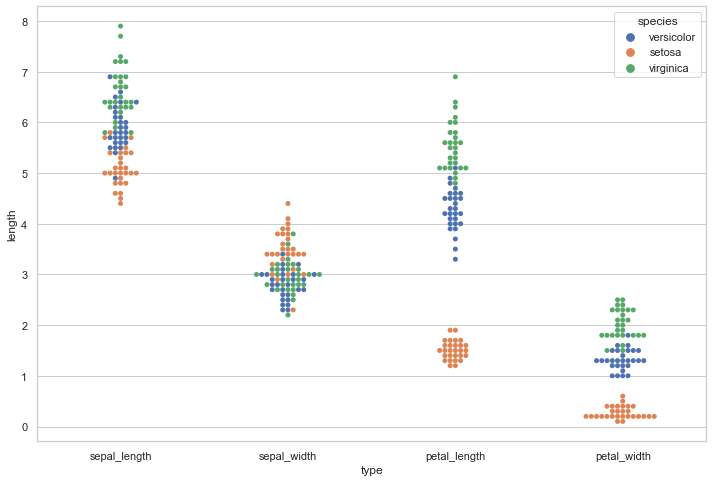

In [121]:
plt.figure(figsize=(12,8))
p = sns.swarmplot(
    x="type",
    y="length",
    hue="species",
    data=train_melt,
)

plt.show()

#### Create 4 subplots (2 rows x 2 columns) of scatterplots.

  - sepal_length x sepal_width
  - petal_length x petal_width
  - sepal_area x petal_area
  - sepal_length x petal_length
 - What are your takeaways?

 train['sepal_area'] = train.sepal_length * train.sepal_width
 train['petal_area'] = train.petal_length * train.petal_width

def scatter_by_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

#test it with one plot

scatter_by_species('sepal_length', 'sepal_width')



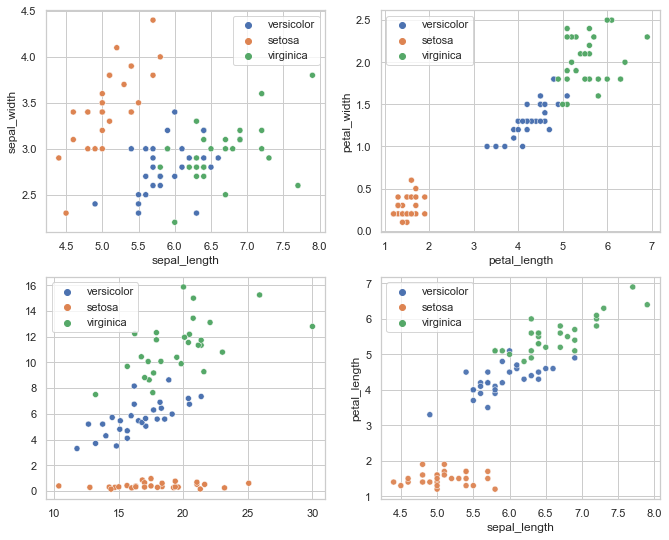

In [129]:
n_rows = 2
n_cols = 2




# plot the first subplot
plt.subplot(2,2,1)
sns.scatterplot(data=train, x='sepal_length', y='sepal_width', hue='species')
plt.title('')
plt.legend()

# the second subplot
plt.subplot(2,2,2)
sns.scatterplot(data=train, x='petal_length', y='petal_width', hue='species')
plt.title('')
plt.legend()

# third subplot
plt.subplot(2,2,3)
sns.scatterplot(data=train, x=(train.sepal_length * train.sepal_width), y=(train.petal_length * train.petal_width), hue='species')
plt.title('')
plt.legend()

# fourth
plt.subplot(2,2,4)
sns.scatterplot(data=train, x='sepal_length', y='petal_length', hue='species', alpha = .95)
plt.title('')
plt.legend()


plt.show()

Versicolor and virginica seem to show correlation between petal_width and petel_length in additon to sepal_length and petal_length. The heatmap after further solidifies this thought.

### Create a heatmap of each variable layering correlation coefficient on top.

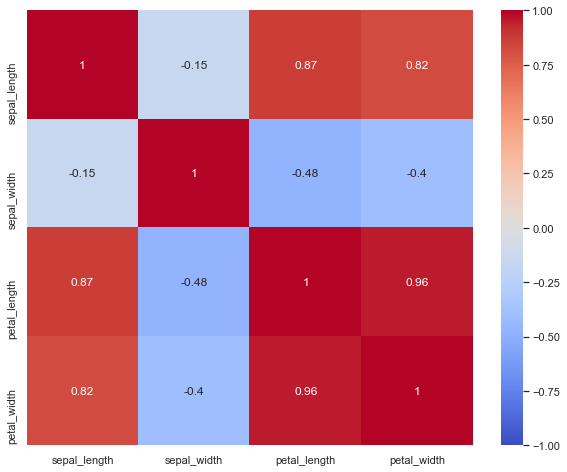

In [130]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.show()

#### Create a scatter matrix visualizing the interaction of each variable.

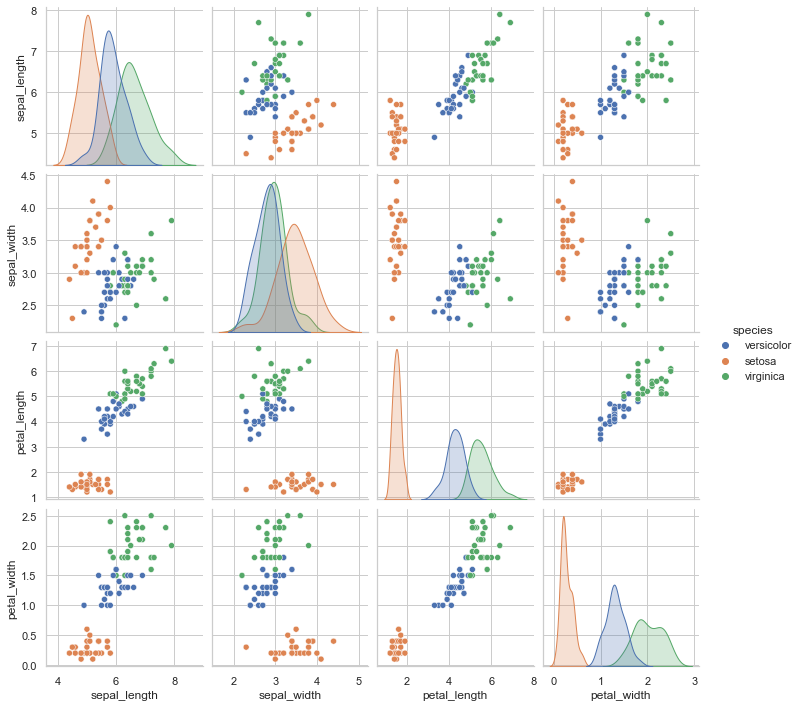

<Figure size 720x576 with 0 Axes>

In [132]:
sns.pairplot(train, hue='species')
plt.figure(figsize=(10,8))
plt.show()

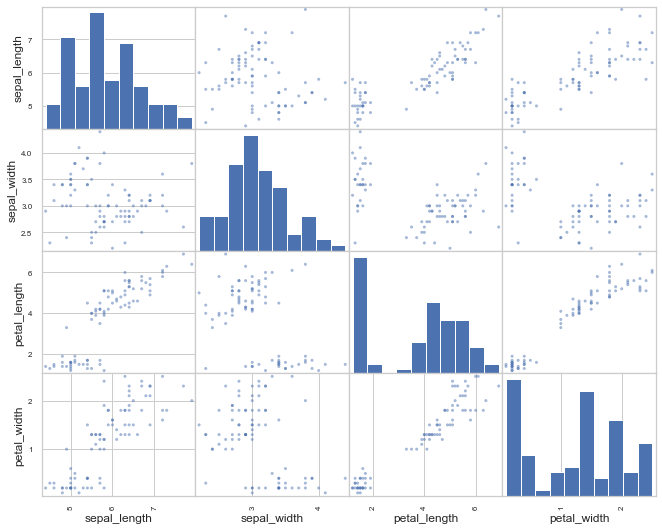

<Figure size 576x432 with 0 Axes>

In [134]:
pd.plotting.scatter_matrix(train)
plt.figure(figsize=(8,6))
plt.show()

#### Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

In [96]:
null_hypothesis = "The sepal length between virginica and versicolor is not signifcantly different"
alternative_hypothesis = "The sepal length between virginica and versicolor is signifcantly different"
confidence_level = .95
a = 1 - confidence_level

In [97]:
virginica = train[train.species == "virginica"].sepal_length
versicolor = train[train.species == "versicolor"].sepal_length

In [98]:
t, p = stats.ttest_ind(virginica, versicolor)
t, p

(5.656491804882077, 6.024259917536193e-07)

In [99]:
if p < a:
    print("We reject the null hypothesis that they are the same")
    print("We move forward w/ the alternative hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis that they are the same
We move forward w/ the alternative hypothesis


#### Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set

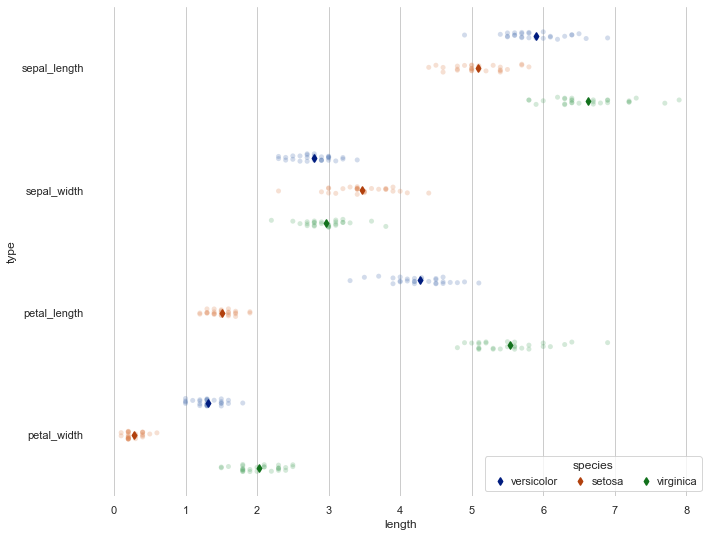

In [114]:
sns.set_theme(style="whitegrid")


# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="length", y="type", hue="species",
              data=train_melt, dodge=True, alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="length", y="type", hue="species",
              data=train_melt, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)
plt.show()